In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Levelized Cost of Electricity (LCOE) and other financial metrics
This turbine (http://hydrovolts.com/products/c12/) was dropped in a canal. They were able to calculate LCOE from a one month trial, http://hydrovolts.com/wp-content/uploads/2011/07/Hydrovolts-Roza-Case-Study1.pdf. Check out page 5 of the report: 
* The turbine produced 4,450 kWh in one month.  At a value of \$.11/kWh (average cost of electricity in US, per 2011 EIA data), this translates to a monthly revenue of just under $490. (The rates for power in Visalia are similar to the number quoted, see here https://www.electricitylocal.com/states/california/visalia/)

$ROI = \frac{Gain~from~investment~-~Cost~of~Investment}{Cost~of~Investment}$

If they're claiming \$490 monthly return for a $20k? investment. That's an ROI of 4.88 with no maintenance needed, or 2.88 with 10%-of-initial-investment-per-year maintenance. Note: The above numbers are pure guesses based on the values of the report! A more thorough analysis would look at flow rates for individual canals. Because of scale, the cost of a smaller generator would also yield larger LCOE values, resulting in a smaller ROI. 

### Really, really, really short Executive Sumary
The ROI looks promising; however the Net Present Value of the investment does not, NPV = \$-14,175. Do me a favor and look at the raw numbers too. There is logistics we need to discuss too, that we can worry about in the future: How far from generation is the power being consumed? Are we dumping into batteries, Tesla style or dumping power back into the grid? 




#### ROI assuming no inderict cost or maintenance

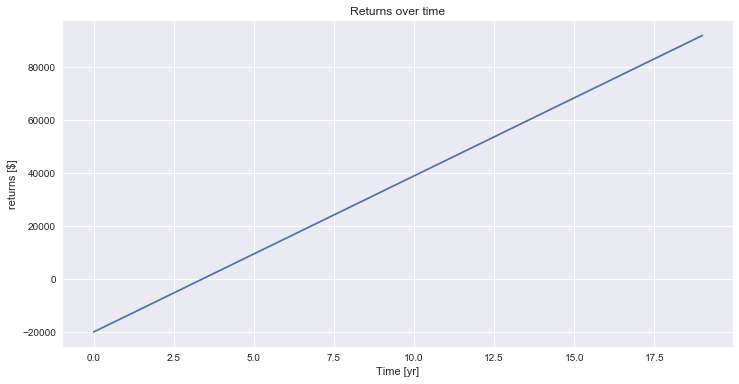

In [58]:
# Initial parameters for time, returns, and initial investment
time = np.arange(0, 20, 1)
monthly_return = 490
investment = 20000

# Function to calculate returns over time


def year_returns(t,maint):
    return -20000 + (490 * 12 - maint*20000) * t 


# Plot yearly returns
plt.figure(figsize=(12, 6))
plt.xlabel('Time [yr]')
plt.ylabel('returns [$]')
plt.title('Returns over time')
plt.plot(time, year_returns(time,0))
plt.show()

In [61]:
# ROI
'This yields an ROI of {}'.format((490 * 12 * 20 - 20000) / (20000))

'This yields an ROI of 4.88'

#### ROI assuming 10% maintenance (A guess)

In [64]:
'This yields an ROI of {}'.format((490 * 12 * 20 - 20000 - .1*20000*20) / (20000))

'This yields an ROI of 2.88'

### Net Present Value (NPV) for investment 


In [113]:
# NPV, C_t = cash flows per period, C_0 = initial investment, rate = discount rate, time = total pay periods 
def npv(C_t, C_0, rate, time):
    total = sum([C_t / (1 + rate)**year for year in range(1, time + 1)]) - C_0
    return 'A Net Present Value of ${:.0f}'.format(total)


npv(490, 20000, 1.75/12 / 100, 12)

'A Net Present Value of $-14175'

# Micro Hydro 
Micro hydro is a type of hydroelectric power that typically produces from 5 kW to 100 kW of electricity using the natural flow of water. Installations below 5 kW are called pico hydro.  Micro hydro is frequently accomplished with a pelton wheel for high head, low flow water supply. Pelton wheel -- uses the concept of jet force to create energy. Water is funneled into a pressurized pipeline with a narrow nozzle at one end. The water sprays out of the nozzle in a jet, striking the double-cupped buckets attached to the wheel. The impact of the jet spray on the curved buckets creates a force that rotates the wheel at high efficiency rates of 70–90%. Pelton wheel turbines are available in various sizes and operate best under low-flow and high-head conditions.

Links
* Assess site for micro http://www.e3a4u.info/wp-content/uploads/B1285-microhydro.pdf

## micro-hydroelectric power generation
* Generates AC power 
* Can be converted to DC with rectifier. DC, with the use of a charge controller, can charge batteries. In this configuration system
behaves like a solar panel system. Instead of solar panels Micro hydro uses a turbine/alternator/rectifier. 
*  The turbine converts the flow and pressure of the water to mechanical energy; the water emerging from the turbine returns to the natural watercourse along a tailrace channel. The turbine turns a generator, which is then connected to electrical loads. 



![Micro Hydro](https://upload.wikimedia.org/wikipedia/commons/2/28/Microhydro_System.svg)

## Head and Flow 
When quantifying head, both gross and net head must be considered. Gross head approximates power accessibility through the vertical distance measurement alone whereas net head subtracts pressure lost due to friction in piping from the gross head. "Flow" is the actual quantity of water falling from a site and is usually measured in gallons per minute, cubic feet per second, or liters per second.[6] Low flow/high head installations in steep terrain have significant pipe costs. A long penstock starts with low pressure pipe at the top and progressively higher pressure pipe closer to the turbine in order to reduce pipe costs.

Power from such a system can be calculated by the equation $P= \frac{Q*H}{k}$, where Q is the flow rate in gallons per minute, H is the static head, and k is a constant of 5,310 $gal*\frac{ft}{min}*kW$. For instance, for a system with a flow of 500 gallons per minute and a static head of 60 feet, the theoretical maximum power output is 5.65 kW. The system is prevented from 100% efficiency (from obtaining all 5.65 kW) due to the real world, such as: turbine efficiency, friction in pipe, and conversion from potential to kinetic energy. Turbine efficiency is generally between 50-80%, and pipe friction is accounted for using the Hazen–Williams equation.

(Source: https://energy.gov/energysaver/microhydropower-systems)

### Permits and Water Rights (Something to consider) 
(Source https://energy.gov/energysaver/planning-microhydropower-system)

When deciding whether to install a microhydropower system on your property, you also need to know your local permit requirements and water rights.

Whether your system will be grid-connected or stand-alone will affect what requirements you must follow. If your microhydropower system will have minimal impact on the environment, and you are not planning to sell power to a utility, the permitting process will most likely involve minimal effort.

Locally, your first point of contact should be the county engineer. Your state energy office may be able to provide you with advice and assistance as well. In addition, you'll need to contact the Federal Energy Regulatory Commission and the U.S. Army Corps of Engineers.

You'll also need to determine how much water you can divert from your stream channel. Each state controls water rights; you may need a separate water right to produce power, even if you already have a water right for another use.

See planning for a small renewable energy system for more information on state and community codes and requirements for small renewable energy systems.

### Advantages and disadvantages
#### System advantages

Microhydro power is generated through a process that utilizes the natural flow of water. This power is most commonly converted into electricity. With no direct emissions resulting from this conversion process, there are little to no harmful effects on the environment, if planned well, thus supplying power from a renewable source and in a sustainable manner. Microhydro is considered a "run-of-river" system meaning that water diverted from the stream or river is redirected back into the same watercourse. Adding to the potential economic benefits of microhydro is efficiency, reliability, and cost effectiveness.

#### System disadvantages
Microhydro systems are limited mainly by characteristics of the site. The most direct limitation comes from small sources with minuscule flow. Likewise, flow can fluctuate seasonally in some areas. Lastly, though perhaps the foremost disadvantage is the distance from the power source to the site in need of energy.  This distributional issue as well as the others are key when considering using a microhydro system.mm